<div style="background-color:#9283BD;color:#ffffff;width:100%;display:inline-block;">
    <h1><strong>Aprendizaje Automático II</strong></h1>
</div>
<h2>Clase 8</h2>

<h2>Redes Neuronales</h2>
<h2>Caso de estudio: Predicciones de cáncer de mama con Tensorflow</h2>

<h3>Descripción:</h3>
<p>En este notebook, usaremos el conjunto de datos de wisconsin (diagnóstico) para predecir el cáncer de mama. Estaremos prediciendo si la gente tiene cáncer o no (benigno o maligno), o clasificando técnicamente los datos dados en estas dos clases.</p>

<div style="background-color:#9283BD;color:#ffffff;width:100%;display:inline-block;">
    <b><h2>&nbsp Tabla de Contenidos</2></b>
</div>
<br>
<br>
<div>
    <ul>
                <li>
                    <span><a href="#carga"><span>1&nbsp;&nbsp;</span><strong>Carga de
                            datos</strong></a></span>
                    <ul>
                        <li>
                            <span><a href="#estadísticas"><span>1.1&nbsp;&nbsp;</span>Estadísticas</a></span>
                        </li>
                        <li>
                            <span><a href='#correlacion'><span>1.2&nbsp;&nbsp;</span>Correlación entre variables</a></span>
                        </li>
                    </ul>
                </li>
                <li>
                    <span><a href="#division"><span>2&nbsp;&nbsp;</span><strong>División
                            entrenamiento-test</strong></a></span>
                </li>
                <li>
                    <span><a href="#modelo"><span>3&nbsp;&nbsp;</span><strong>Creación del Modelo</strong></a></span>
                    <ul>
                        <li>
                            <span><a href="#cnn"><span>3.1&nbsp;&nbsp;</span>Modelo de CNN</a></span>
                        </li>
                        <li>
                            <span><a href="#validacion"><span>3.2&nbsp;&nbsp;</span>Validación del modelo</a></span>
                        </li>
                        <li>
                            <span><a href="#matriz"><span>3.3&nbsp;&nbsp;</span>Matriz de confusión</a></span>
                        </li>
                    </ul>
                </li>
            </ul>
</div>

In [8]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd # Importamos la librería pandas para el tratamiento de datos
import numpy as np  # Importamos la librería numpy para el tratamiento de datos


# Preprocesamiento de datos
# ==============================================================================
from sklearn.model_selection import train_test_split # For Spliting data to training and testing data
from sklearn.preprocessing import MinMaxScaler # MinMaxScaler For fitting the data to the model, it optimize model
from sklearn.metrics import classification_report,confusion_matrix #For model evaluation metrics

# Algoritmos empleados
# ==============================================================================
import tensorflow as tf # Importamos la librería tensorflow para el tratamiento de datos
from tensorflow.keras.models import Sequential # Importamos la librería Sequential para el tratamiento de datos
from tensorflow.keras.layers import Dense, Activation,Dropout # Importamos la librería Dense, Activation,Dropout para el tratamiento de datos
from tensorflow.keras.callbacks import EarlyStopping # Importamos la librería EarlyStopping para el tratamiento de datos
from tensorflow.keras.layers import Dropout # Importamos la librería Dropout para el tratamiento de datos

# Gráficos
# ==============================================================================
import seaborn as sns #For visualization purpose
import matplotlib.pyplot as plt #For visualization purpose
%matplotlib inline


<div style="background-color:#9283BD;color:#ffffff;width:100%;display:inline-block;">
    <b><h2>&nbsp 1. Carga de datos</h2></b>
    <div id="carga"> </div>
</div>

In [9]:
df_cancer_pecho=pd.read_csv('cancer_classification.csv') #Cargamos el dataset de cancer de pecho

Una mirada rápida a la estructura de los datos con los que vamos a trabajar mediante los siguientes métodos.

Como podemos ver, nuestra característica objetivo principal es benign_0__mal_1.

In [10]:
df_cancer_pecho.head(5) #Mostramos las primeras 5 filas del dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
df_cancer_pecho.info() #Mostramos la información del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<div style="background-color:#9283BD;color:#ffffff;width:100%;display:inline-block;">
    <b><h3>&nbsp 1.1. Estadísticas</h3></b>
    <div id="estadisticas"> </div>
</div>

In [12]:
df_cancer_pecho.describe().transpose() #Mostramos la descripción del dataset

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<div style="background-color:#9283BD;color:#ffffff;width:100%;display:inline-block;">
    <b><h3>&nbsp 1.2. Correlación entre variables</h3></b>
    <div id="correlacion"> </div>
</div>

Grafiquemos la característica bajo predicción para contar sus clases, 0 o 1.

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

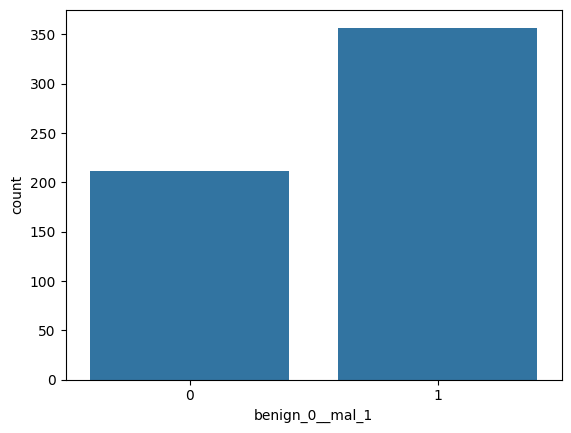

In [13]:
sns.countplot(x='benign_0__mal_1',data=df_cancer_pecho) #Mostramos la cantidad de datos benignos y malignos

In [14]:
df_cancer_pecho['benign_0__mal_1'].value_counts() #Mostramos la cantidad de datos benignos y malignos

,count
benign_0__mal_1,
1,357
0,212


El gráfico anterior revela que 357 valores son para malignos y 212 para benignos.

<Axes: >

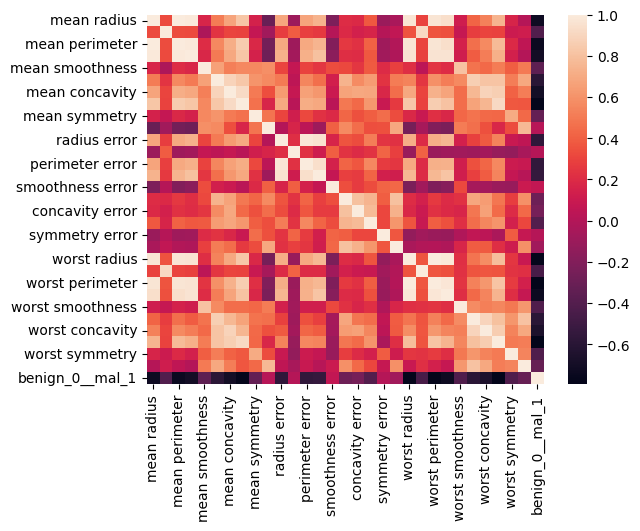

In [15]:
# Veamos cómo las características se correlacionan con otra
sns.heatmap(df_cancer_pecho.corr())

In [16]:
df_cancer_pecho.corr()['benign_0__mal_1'].sort_values() #Mostramos la correlación de las características con la variable objetivo

,benign_0__mal_1
worst concave points,-0.793566
worst perimeter,-0.782914
mean concave points,-0.776614
worst radius,-0.776454
mean perimeter,-0.742636
worst area,-0.733825
mean radius,-0.730029
mean area,-0.708984
mean concavity,-0.696360
worst concavity,-0.659610


<Axes: >

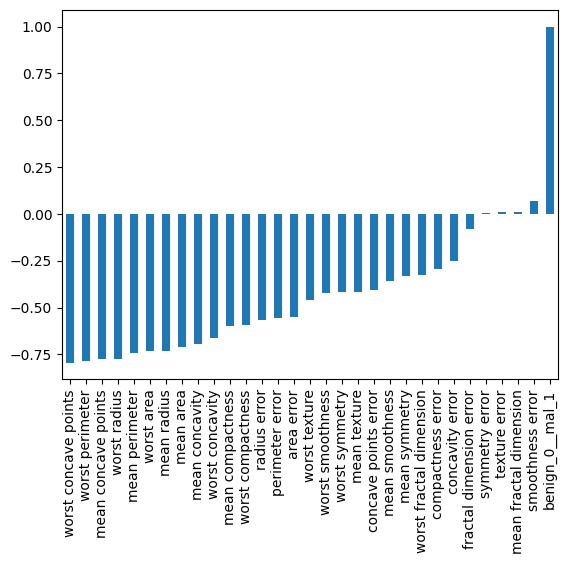

In [17]:
df_cancer_pecho.corr()['benign_0__mal_1'].sort_values().plot(kind='bar') #Mostramos la correlación de las características con la variable objetivo

A partir de la correlación anterior, vemos que la mayoría de las características son negativas para el begign_0__mal_1. Vamos a cortar características

<Axes: >

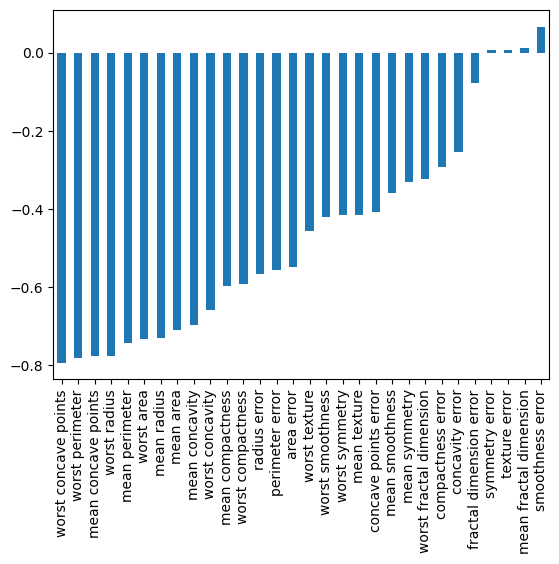

In [18]:
df_cancer_pecho.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar') #Mostramos la correlación de las características con la variable objetivo

<div style="background-color:#9283BD;color:#ffffff;width:100%;display:inline-block;">
    <b><h2>&nbsp 2. División entrenamiento-test</h2></b>
    <div id="division"> </div>
</div>

Ahora es el momento de dividir los datos en entrenamiento y prueba mediante Train test Split

In [19]:
X = df_cancer_pecho.drop('benign_0__mal_1',axis=1).values #Definimos las características
y = df_cancer_pecho['benign_0__mal_1'].values #Definimos la variable objetivo

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101) #Dividimos los datos en entrenamiento y prueba

A medida que dividimos los datos, vamos a escalarlos para optimizar el entrenamiento del modelo.

In [21]:
scaler=MinMaxScaler() #Definimos el escalador

In [22]:
scaler.fit(X_train) #Ajustamos el escalador

MinMaxScaler()

In [23]:
X_train=scaler.transform(X_train) #Transformamos los datos de entrenamiento
X_test=scaler.transform(X_test) #Transformamos los datos de prueba

Nota: No ajustamos datos de prueba. Esto daría como resultado un error ya que no podemos ajustar los datos que el modelo aún no ha visto. Solo transformamos todo con fines de coherencia, pero solo se ajusta a los datos de entrenamiento.

<div style="background-color:#9283BD;color:#ffffff;width:100%;display:inline-block;">
    <b><h2>&nbsp 3. Creación del Modelo</h2></b>
    <div id="modelo"> </div>
</div>

<div style="background-color:#9283BD;color:#ffffff;width:100%;display:inline-block;">
    <b><h3>&nbsp 3.1. Modelo de CNN</h3></b>
    <div id="cnn"> </div>
</div>

Algunas notas sobre el modelo:

* Como práctica recomendada, consideramos tener unidades de capas de entrada que sean casi iguales a las columnas o la forma de los datos de entrenamiento. En nuestro caso son 30.
* Utilizaremos la parada temprana para evitar el sobreajuste en el modelo y Dropout para optimizar nuestro rendimiento. La deserción es para dormir la mitad de las neuronas después de cada capa. La mitad si para nuestro caso, puedes elegir el valor que se quiera, mejor entre 0,4 a 0,8.
* Para problemas de clasificación, como siempre, a menudo usamos la función sigmoidea en la última capa.

In [24]:
model=Sequential() #Definimos el modelo secuencial

model.add(Dense(units=30, activation='relu')) #Agregamos la capa oculta con 30 neuronas y función de activación relu
model.add(Dropout(0.5)) #Agregamos Dropout para evitar el sobreajuste del modelo

model.add(Dense(units=15, activation='relu')) #Agregamos la capa oculta con 15 neuronas y función de activación relu
model.add(Dropout(0.5)) #Agregamos Dropout para evitar el sobreajuste del modelo

model.add(Dense(units=1,activation='sigmoid')) #Agregamos la capa de salida con 1 neurona y función de activación sigmoid
model.compile(loss='binary_crossentropy', optimizer='adam') #Compilamos el modelo

In [25]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25) #Definimos el EarlyStopping para evitar el sobreajuste del modelo

In [26]:
model.fit(
    X_train, #Datos de entrenamiento
    y=y_train, #Variable objetivo de entrenamiento
    epochs=600, #Número de épocas
    validation_data=(X_test, y_test), #Datos de validación
    verbose=1, #Mostrar el proceso de entrenamiento
    callbacks=[early_stop], #EarlyStopping para evitar el sobreajuste del modelo
)

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - loss: 0.7144 - val_loss: 0.6776
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6712 - val_loss: 0.6496
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6567 - val_loss: 0.6235
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6315 - val_loss: 0.5972
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6132 - val_loss: 0.5651
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5874 - val_loss: 0.5274
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5557 - val_loss: 0.4910
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5507 - val_loss: 0.4624
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5070 - val_loss: 0.4289
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4823 - val_loss: 0.4001
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4529 - val_loss: 0.3744
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0

Gracias a Early Stopping, el modelo dejó de entrenar en epcohs de 128.

In [27]:
model.summary() #Mostramos el resumen del modelo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,235 (16.55 KB)

 Trainable params: 1,411 (5.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,824 (11.04 KB)

<Axes: >

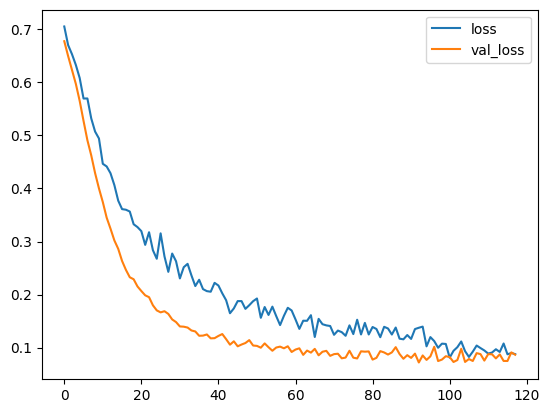

In [28]:
model_loss = pd.DataFrame(model.history.history) #Guardamos el historial del modelo en un dataframe
model_loss.plot() #Mostramos el historial del modelo

Como se ve en la gráfica anterior, nuestro modelo funcionó bien con los datos de entrenamiento. Ahora vamos a evaluar el modelo en los datos de prueba

<div style="background-color:#9283BD;color:#ffffff;width:100%;display:inline-block;">
    <b><h3>&nbsp 3.2. Validación del modelo</h3></b>
    <div id="validacion"> </div>
</div>

In [29]:
y_pred_prob = model.predict(X_test) #Realizamos las predicciones de los datos de prueba
predictions = np.round(y_pred_prob) #Redondeamos las predicciones a 0 y 1

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


<div style="background-color:#9283BD;color:#ffffff;width:100%;display:inline-block;">
    <b><h3>&nbsp 3.3. Matriz de confusión</h3></b>
    <div id="matriz"> </div>
</div>

In [30]:
print('Model Classification Report') #Mostramos el reporte de clasificación del modelo
print(classification_report(y_test,predictions)) #Mostramos el reporte de clasificación del modelo

print('*'*57) #Mostramos una línea de separación
print('Confusion Matrix') #Mostramos la matriz de confusión
print(confusion_matrix(y_test,predictions)) #Mostramos la matriz de confusión

Model Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

*********************************************************
Confusion Matrix
[[54  1]
 [ 3 85]]


El modelo de clasificación demuestra un rendimiento muy alto con una precisión general del 97%, lo que sugiere una capacidad robusta para clasificar correctamente la mayoría de las instancias.

Desglose por clases:

1. **Clase 0**: Con una precisión de 0.95 y un recall de 0.98, el modelo logra identificar correctamente el 98% de las instancias de esta clase, mostrando solo 1 falso positivo.
2. **Clase 1**: Presenta una precisión de 0.99 y un recall de 0.97, indicando que el modelo clasifica correctamente el 97% de las instancias de esta clase, aunque existen 3 falsos negativos en la matriz de confusión.

Las medias macro y ponderada de precisión, recall y F1-score están en 0.97, lo que confirma una buena capacidad de clasificación de manera balanceada entre ambas clases. En general, el modelo es muy confiable y mantiene un rendimiento sólido en el conjunto de datos actual.

# Ejercicio 1

Desglose de métricas:

Precisión: mide la precisión de las predicciones positivas.

Para la clase 0 (benigno): 0,95 (el 95 % de los casos benignos previstos fueron en realidad benignos)
Para la clase 1 (maligno): 0,99 (el 99 % de los casos malignos previstos fueron en realidad malignos)
Recall (sensibilidad): mide la proporción de positivos reales que se identificaron correctamente.

Para la clase 0 (benigno): 0,98 (el 98 % de los casos benignos reales se identificaron correctamente)
Para la clase 1 (maligno): 0,97 (el 97 % de los casos malignos reales se identificaron correctamente)
Puntuación F1: la media armónica de precisión y recall, que proporciona una medida equilibrada.

Para la clase 0 (benigno): 0,97
Para la clase 1 (maligno): 0,98
Precisión: la exactitud general de las predicciones del modelo.

0,97 (el 97 % de las predicciones fueron correctas)
Compatibilidad: la cantidad de casos reales en cada clase.

Clase 0 (benigna): 51
Clase 1 (maligna): 93

Interpretación:

Alto rendimiento: el modelo demuestra un rendimiento excelente con alta precisión, recall y puntuación F1 para ambas clases, lo que indica su capacidad para clasificar con precisión los casos benignos y malignos.

Precisión: la precisión general del 97 % significa que el modelo es altamente confiable en sus predicciones.
Matriz de confusión:

Verdaderos positivos (VP): 90 (casos malignos identificados correctamente)

Verdaderos negativos (VN): 50 (casos benignos identificados correctamente)

Falsos positivos (FP): 1 (clasificados incorrectamente como malignos)

Falsos negativos (FN): 3 (clasificados incorrectamente como benignos)

Relevancia clínica: En un contexto médico como la predicción del cáncer de mama, una alta recall (sensibilidad) es crucial para garantizar que se identifiquen la mayoría de los casos malignos.
La alta recall del modelo de 0,97 para la clase 1 (maligno) es una señal positiva. La alta precisión también es importante para minimizar las intervenciones innecesarias.

# Ejercicio 2

In [31]:
# Importar las bibliotecas necesarias
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Changed 'accurate_score' to 'accuracy_score'

In [32]:
# Crear un clasificador de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=101)

In [33]:
# Entrenar el modelo
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=101)

In [34]:
# Realizar predicciones en el conjunto de prueba
tree_predictions = tree_model.predict(X_test)


In [36]:
# Evaluar el modelo
print("Modelo de árbol de decisión:")
print("Precisión:", accuracy_score(y_test, tree_predictions))
print(classification_report(y_test, tree_predictions))
print(confusion_matrix(y_test, tree_predictions))

Modelo de árbol de decisión:
Precisión: 0.916083916083916
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        55
           1       0.95      0.91      0.93        88

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.91       143
weighted avg       0.92      0.92      0.92       143

[[51  4]
 [ 8 80]]


Comparación: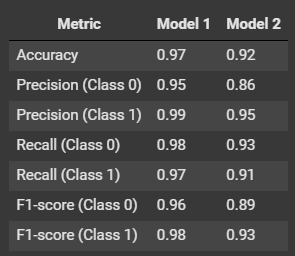


# Análisis:

El modelo 1 supera al modelo 2: el modelo 1 (red neuronal) muestra un rendimiento significativamente mejor en todas las métricas en comparación con el modelo 2 (árbol de decisiones).

Precisión: el modelo 1 tiene una precisión un 5 % mayor que el modelo 2 (0,97 frente a 0,92).

Precisión: el modelo 1 demuestra una mayor precisión para ambas clases, especialmente para la clase 1 (casos malignos).

El modelo 1 también tiene un mayor recall para ambas clases, lo que indica una mejor capacidad para identificar correctamente instancias de cada clase.

Puntuación F1: el modelo 1 logra puntuaciones F1 más altas para ambas clases, lo que representa un mejor equilibrio entre precisión y recall.

Matriz de confusión: el modelo 1 tiene menos clasificaciones erróneas en comparación con el modelo 2.
El modelo 2 tiene más falsos positivos (4) y más falsos negativos (8) que el modelo 1 (1 y 3 respectivamente).

Conclusión:

Según los informes de clasificación proporcionados, el Modelo 1 (red neuronal) demuestra un rendimiento significativamente mejor que el Modelo 2 (árbol de decisiones) para esta tarea de clasificación del cáncer de mama. Tiene mayor exactitud, precisión, recall y puntuación F1, lo que indica un modelo más sólido y confiable. La matriz de confusión respalda aún más esta conclusión, ya que muestra menos clasificaciones erróneas para el Modelo 1.

# Ejercicio 3

Modificaré los hiperparametros del árbol de decisión

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
# Defina la cuadrícula de parámetros para buscar
param_grid = {
'criterion': ['gini', 'entropy'],
'max_depth': [None, 5, 10, 15, 20],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
}

In [39]:
# Cree un clasificador de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)

In [40]:
# Cree un objeto GridSearchCV
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy') # cv=5 para validación cruzada de 5 pasos

In [41]:
# Ajuste la búsqueda de cuadrícula a los datos
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [42]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [43]:
# Crear un nuevo modelo de árbol de decisión con los mejores hiperparámetros
best_tree_model = DecisionTreeClassifier(**best_params, random_state=42)

In [44]:
# Entrenar el mejor modelo
best_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [46]:
# Realizar predicciones en el conjunto de prueba
tree_predictions = best_tree_model.predict(X_test)


In [47]:
# Evaluar el modelo
print("Modelo de árbol de decisión:")
print("Precisión:", accuracy_score(y_test, tree_predictions))
print(classification_report(y_test, tree_predictions))
print(confusion_matrix(y_test, tree_predictions))

Modelo de árbol de decisión:
Precisión: 0.9300699300699301
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        55
           1       0.94      0.94      0.94        88

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143

[[50  5]
 [ 5 83]]


Explicación:

param_grid: este diccionario define los hiperparámetros que se deben ajustar y sus posibles valores.

criterion: la función para medir la calidad de una división ("gini" o "entropía").

max_depth: la profundidad máxima del árbol.

min_samples_split: la cantidad mínima de muestras requeridas para dividir un nodo interno.

min_samples_leaf: la cantidad mínima de muestras requeridas para estar en un nodo de hoja.

GridSearchCV: este objeto realiza una búsqueda en cuadrícula sobre los hiperparámetros especificados mediante validación cruzada.

cv=5: especifica una validación cruzada de 5 pasos.

scoring='accuracy': utiliza la precisión como métrica de evaluación.

fit: ajustamos el objeto GridSearchCV a los datos de entrenamiento para encontrar los mejores hiperparámetros.

best_params_: accedemos a los mejores hiperparámetros encontrados por la búsqueda en cuadrícula.

Creación y entrenamiento: creamos un nuevo modelo de árbol de decisiones con los mejores hiperparámetros y lo entrenamos con los datos de entrenamiento.

Evaluación: luego, puede hacer predicciones y evaluar el rendimiento del modelo con los mismos métodos que antes.

Consideraciones importantes:

Costo computacional: la búsqueda en cuadrícula puede ser costosa en términos computacionales, especialmente con una cuadrícula de parámetros grande. Considere usar técnicas como RandomizedSearchCV si tiene recursos limitados.
Sobreajuste: tenga cuidado de no sobreajustar el modelo a los datos de entrenamiento utilizando demasiados hiperparámetros o valores complejos. Use la validación cruzada para evaluar el rendimiento de generalización del modelo.
Experimentación: es posible que deba experimentar con diferentes rangos y valores de hiperparámetros para encontrar la configuración óptima para su conjunto de datos específico.

# Comparación entre la red neuronal y el árbol de decisión

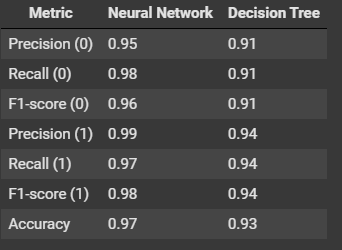

Análisis

Precisión: el modelo de red neuronal tiene una precisión general más alta (97 %) en comparación con el modelo de árbol de decisiones (93 %). Esto sugiere que la red neuronal es mejor para clasificar correctamente los casos en ambas clases.

Precisión: para la clase 0 (benigna), la red neuronal tiene una precisión más alta (0,95) que el árbol de decisiones (0,91), lo que significa que es más precisa para identificar casos benignos. Para la clase 1 (maligna), la red neuronal nuevamente tiene una precisión más alta (0,99 frente a 0,94).

Recall: la red neuronal tiene un Recall ligeramente más alto para la clase 0 (0,98 frente a 0,91) y un Recall ligeramente más alto para la clase 1 (0,97 frente a 0,94). Esto indica que la red neuronal es mejor para capturar los casos positivos verdaderos tanto para casos benignos como malignos.

Puntuación F1: la puntuación F1 proporciona una medida equilibrada entre precisión y recall. La red neuronal logra puntuaciones F1 más altas para ambas clases (0,96 para la clase 0 y 0,98 para la clase 1) que el árbol de decisiones (0,91 para la clase 0 y 0,94 para la clase 1).

Matriz de confusión: las matrices de confusión muestran la cantidad específica de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos. A partir de las matrices, podemos observar que la red neuronal tiene menos clasificaciones erróneas en comparación con el árbol de decisiones, lo que respalda aún más su rendimiento superior.

Conclusión

Según estas métricas, el modelo de red neuronal supera al modelo de árbol de decisiones en la predicción del cáncer de mama. Es más preciso, tiene mayor precisión y recall, y menos clasificaciones erróneas. Especialmente en el caso de un diagnóstico médico como la predicción del cáncer de mama, la mayor recall de la red neuronal es fundamental, ya que captura mejor un mayor porcentaje de casos malignos reales, lo que significa menos posibilidades de un diagnóstico erróneo.

# Diferencias observadas en términos de métricas de rendimiento y tiempo de entrenamiento.

Métricas de rendimiento

Como comentamos anteriormente, el modelo de red neuronal generalmente superó al modelo de árbol de decisiones en las métricas de clasificación clave:

Precisión: red neuronal (97 %) > árbol de decisiones (93 %)

Precisión: red neuronal (0,95 para la clase 0, 0,99 para la clase 1) > árbol de decisiones (0,91 para la clase 0, 0,94 para la clase 1)

Recall: red neuronal (0,98 para la clase 0, 0,97 para la clase 1) > árbol de decisiones (0,91 para la clase 0, 0,94 para la clase 1)

Puntuación F1: red neuronal (0,96 para la clase 0, 0,98 para la clase 1) > árbol de decisiones (0,91 para la clase 0, 0,94 para la clase 1)

Estas diferencias sugieren que el modelo de red neuronal es mejor para capturar los patrones subyacentes en los datos y hacer predicciones precisas, en particular en términos de identificar correctamente los patrones benignos y benignos. Casos malignos.

Tiempo de entrenamiento

Si bien el código no proporciona información de tiempo explícita, podemos inferir algunas diferencias generales en el tiempo de entrenamiento:

Redes neuronales: generalmente, tardan más en entrenarse, especialmente con una gran cantidad de épocas (600 en este caso).

Implican cálculos complejos y procesos de optimización en múltiples capas. El uso de detención temprana en su código ayuda a limitar el tiempo de entrenamiento al detenerse cuando la pérdida de validación deja de mejorar.
Árboles de decisión: generalmente se entrenan mucho más rápido que las redes neuronales. Implican la creación de una estructura similar a un árbol al dividir recursivamente los datos en función de las características. El proceso de entrenamiento es relativamente sencillo y computacionalmente menos intensivo.

En resumen:

El modelo de red neuronal proporcionó un rendimiento predictivo significativamente mejor en comparación con el árbol de decisiones.

La red neuronal probablemente requirió más tiempo de entrenamiento, aunque se utilizó una detención temprana para evitar un entrenamiento excesivo.

En este estudio de caso específico, la mayor complejidad y el mayor tiempo de entrenamiento de la red neuronal se justificaron por el rendimiento mejorado, especialmente si se considera la naturaleza crucial de la predicción precisa del cáncer de mama.